#**Name: Kutbuddin M Ambawala**
##**Task1: Prediction using supervised Machine Learning**
###**GRIP@ The Sparks Foundation**
####**The task required us to predict the percentage score, a student could score based on the number of hours studied, using a single variable linear regression model**


##**Importing the required Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt

##**Loading The dataset from the source.**

In [ ]:
#Reading and storing the data in a dataframe
data_students=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [ ]:
print(data_students)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [ ]:
#Going throught the first five values
data_students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#checking the datatype and number of entries
data_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##**Visualizing the data**

Text(0.5, 1.0, 'Hours and Scores')

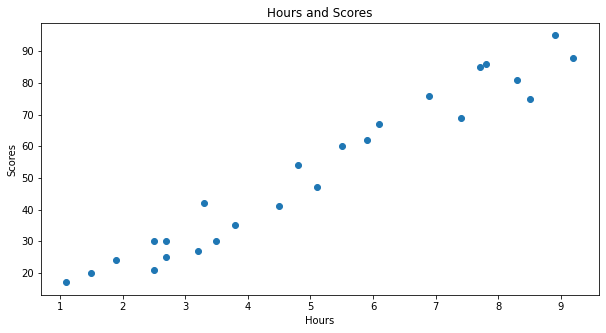

In [ ]:
# We try to find a relation between the Hours Studied and Marks Obtained through visualization
plt.figure(figsize=(10,5))
plt.scatter(data_students["Hours"],data_students["Scores"],marker="o")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours and Scores")

In [ ]:
x_hours=data_students.iloc[:,:-1].values
print(x_hours,end="\n")

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
y_marks=data_students.iloc[:,1].values
print(y_marks)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


##**Training the model**
####**We split the data into training and test sets following 80/20 ratio**

In [ ]:
from sklearn import model_selection
x_hours_train,x_hours_test,y_marks_train,y_marks_test=model_selection.train_test_split(x_hours,y_marks,test_size=0.2,random_state=0)

In [ ]:
##fitting the data into the model
linear_regression=linear_model.LinearRegression()
linear_regression.fit(x_hours,y_marks)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Scores')

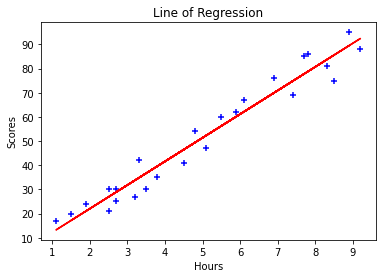

In [ ]:
#plotting the regression line obtained throuh the model
regression_line=linear_regression.coef_*x_hours +linear_regression.intercept_
plt.scatter(x_hours,y_marks,color="blue",marker="+")
plt.plot(x_hours,regression_line,color="red")
plt.title("Line of Regression")
plt.xlabel("Hours")
plt.ylabel("Scores")

Text(0, 0.5, 'Scores')

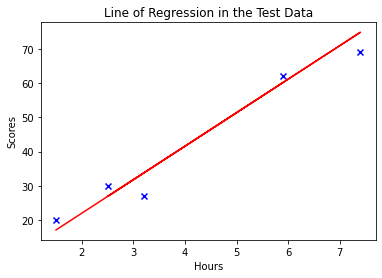

In [ ]:
y_scores_predicted=linear_regression.predict(x_hours_test)#The predicted scores for test data hours
plt.scatter(x_hours_test,y_marks_test,color="blue",marker="x")
plt.plot(x_hours_test,y_scores_predicted,color="red")
plt.title("Line of Regression in the Test Data")
plt.xlabel("Hours")
plt.ylabel("Scores")

###**Actual Result and Predicted Result**

In [ ]:
actual_predicted=pd.DataFrame({'Actual':y_marks_test,'Predicted':y_scores_predicted})
actual_predicted

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [ ]:
#The training and testing score is found
linear_regression.score(x_hours_train,y_marks_train)
linear_regression.score(x_hours_test,y_marks_test)

0.9491748734859172

####**Making a custom prediction on given hours**

In [ ]:
hours=9.25
test=np.array([hours]).reshape(-1,1)
score_predict=linear_regression.predict(test)
print(f"Given hours: {hours}")
print(f"The predicted score for the given hours comes out to be: {score_predict}")

Given hours: 9.25
The predicted score for the given hours comes out to be: [92.90985477]


####**Evaluating the model**

In [ ]:
from sklearn import metrics  
# We find the particular errors to find out the accuracy of the algorithm
print('Mean Absolute Error:',metrics.mean_absolute_error(y_marks_test, y_scores_predicted)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_marks_test, y_scores_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_marks_test, y_scores_predicted)))
print('R-2:', metrics.r2_score(y_marks_test, y_scores_predicted))

Mean Absolute Error: 4.071877793635605
Mean Squared Error: 20.138948129940175
Root Mean Squared Error: 4.487643939746131
R-2: 0.9491748734859172


####**Thank You**